# World Development Indicators

Looking at world development indicators across all countries. Data came from Kaggle [here](https://www.kaggle.com/worldbank/world-development-indicators)

## Data Rangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
data = pd.read_csv("./wdi-data/Indicators.csv")
area = pd.read_csv("./country-area/country-area.csv", skiprows=4)

In [9]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [84]:
countryNames = data["CountryName"].unique()
indicators = data["IndicatorName"].unique()
countryNames = countryNames[32:]
countryNames[1:30]

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria'], dtype=object)

# Analyzing Government Indicators

In [88]:
gov_indicators = [s for s in indicators if "gov" in s]
print(gov_indicators)

['General government final consumption expenditure (% of GDP)', 'General government final consumption expenditure (constant 2005 US$)', 'General government final consumption expenditure (current US$)', 'General government final consumption expenditure (constant LCU)', 'General government final consumption expenditure (current LCU)', 'General government final consumption expenditure (annual % growth)', 'Expenditure on primary as % of government expenditure on education (%)', 'Expenditure on secondary as % of government expenditure on education (%)', 'Expenditure on tertiary as % of government expenditure on education (%)', 'Military expenditure (% of central government expenditure)', 'Central government debt, total (% of GDP)', 'Central government debt, total (current LCU)', 'Net ODA received (% of central government expense)', 'Health expenditure, public (% of government expenditure)', 'Expenditure on education as % of total government expenditure (%)', 'Claims on central government, e

In [74]:
gov_data = data[(data["CountryName"].isin(countryNames)) & (data["IndicatorName"].isin(gov_indicators)) & (data["Year"] == 2014)]

In [75]:
gov_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5546096,World,WLD,CPIA property rights and rule-based governance...,IQ.CPA.PROP.XQ,2014,2.861842
5546373,Afghanistan,AFG,Claims on central government (annual growth as...,FM.AST.CGOV.ZG.M3,2014,5.350731
5546374,Afghanistan,AFG,"Claims on central government, etc. (% GDP)",FS.AST.CGOV.GD.ZS,2014,-6.176219
5546402,Afghanistan,AFG,CPIA property rights and rule-based governance...,IQ.CPA.PROP.XQ,2014,1.500000
5546452,Afghanistan,AFG,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,2014,18.068340


In [172]:
area_2014 = area[["Country Name", "2014"]]
area_2014.columns = ["CountryName", "Area in 2014"]

In [186]:
newData = gov_data.pivot_table(values="Value", index=["CountryName"], columns="IndicatorName")
newData.head()

IndicatorName,CPIA property rights and rule-based governance rating (1=low to 6=high),Claims on central government (annual growth as % of broad money),"Claims on central government, etc. (% GDP)",Expenditure on education as % of total government expenditure (%),Expenditure on primary as % of government expenditure on education (%),Expenditure on secondary as % of government expenditure on education (%),Expenditure on tertiary as % of government expenditure on education (%),General government final consumption expenditure (% of GDP),General government final consumption expenditure (annual % growth),General government final consumption expenditure (constant 2005 US$),General government final consumption expenditure (constant LCU),General government final consumption expenditure (current LCU),General government final consumption expenditure (current US$),Time spent dealing with the requirements of government regulations (% of senior management time)
CountryName,,,,,,,,,,,,,,
Afghanistan,1.5,5.350731,-6.176219,18.06834,NaN,NaN,NaN,12.765214,NaN,NaN,NaN,1.469042e+11,2.557921e+09,9.8
Albania,NaN,1.842892,27.701920,NaN,NaN,NaN,NaN,11.195688,8.731858,1.158635e+09,4.938514e+10,1.560164e+11,1.479120e+09,NaN
Algeria,NaN,11.846489,-20.358825,NaN,NaN,NaN,NaN,19.433061,1.100000,3.439873e+10,1.445653e+11,3.343479e+12,4.149318e+10,NaN
Angola,NaN,16.703770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,-0.265717,15.628621,NaN,NaN,NaN,NaN,17.110780,NaN,NaN,NaN,5.640800e+08,2.089185e+08,NaN


In [181]:
test = newData["General government final consumption expenditure (current LCU)"]
test2 = pd.DataFrame({ "General government final consumption expenditure (current LCU)":test.values}, index=test.index)

In [179]:
test3 = pd.merge(area_2014, test2, left_on="CountryName", right_index=True, how="left", sort=False)

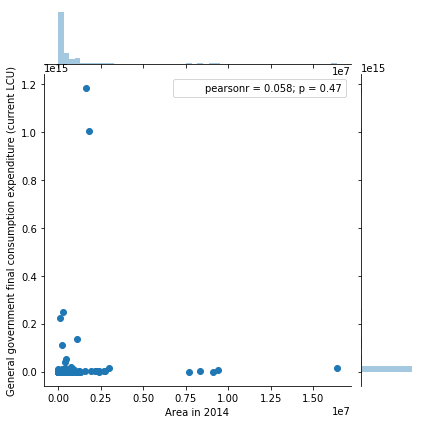

In [180]:
sns.jointplot(x="Area in 2014", y="General government final consumption expenditure (current LCU)", data=test3)

In [201]:
test4 = pd.merge(area_2014, newData, left_on="CountryName", right_index=True, how="left", sort=False)

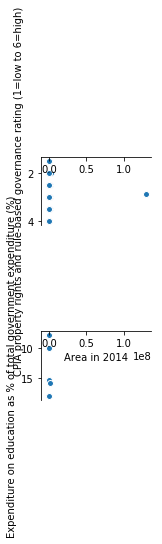